In [59]:
#1.import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [28]:
#2.Load Dataset

df=pd.read_csv("Iris.csv")

#3.Print no. of rows and columns
df.shape

(150, 6)

In [11]:
#4.Print DataFrame into Data types
print(df.dtypes)


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [14]:
#5.Print attribute name

print("Attribute names : ",df.columns)

Attribute names :  Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [15]:
#6.Print Top 5 rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [16]:
#7.Print Bottom 5 rows
print(df.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [20]:
#8.print the unique class labels

unique_labels = set(df.Species)

print("Unique class labels:", unique_labels)

#or

unique_labels=df["Species"].unique()
print("Unique class labels:", unique_labels)


Unique class labels: {'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'}
Unique class labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [24]:
#9.Print no. of missing values in each column

print(df.isnull().sum())

#Print no. of examples from each class label
print("Number of examples per class label:")
print(df['Species'].value_counts())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Number of examples per class label:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [32]:
#10.Drop the ID column

print(df.drop(columns=["Id"]))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [33]:
#11.Print Summery statics
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


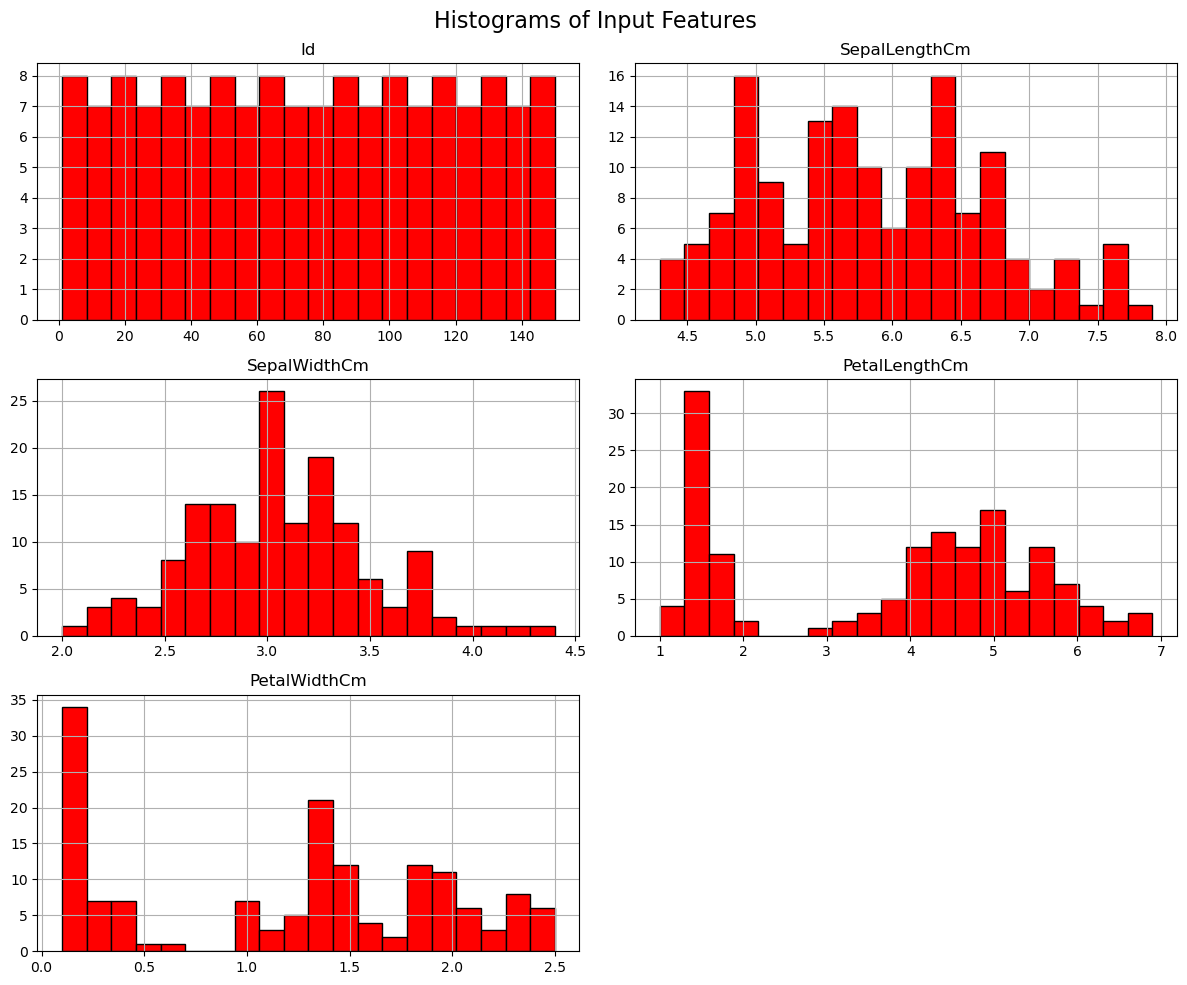

In [41]:
#12. Plot histogram  of all input features

df.hist(bins=20, figsize=(12, 10), edgecolor='black',color='red')
plt.suptitle('Histograms of Input Features', fontsize=16)
plt.tight_layout()
plt.show()

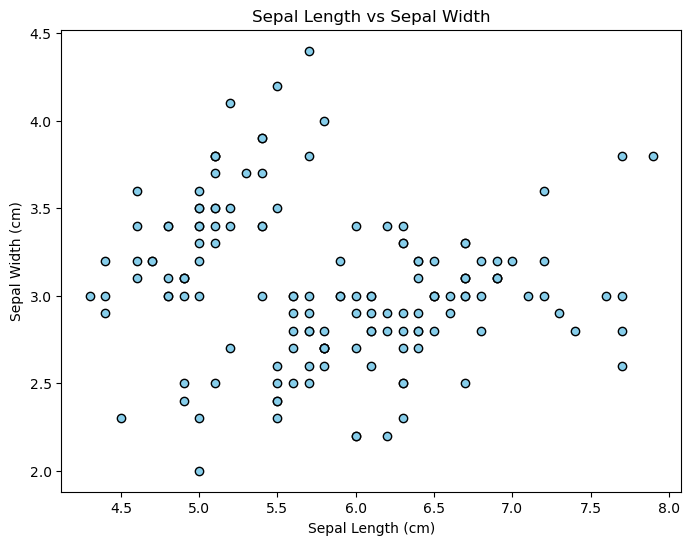

In [44]:
#13.create a scatter plot of 'SepalLengthCm' vs 'SepalWidthCm'
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], color='skyblue', edgecolor='k')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

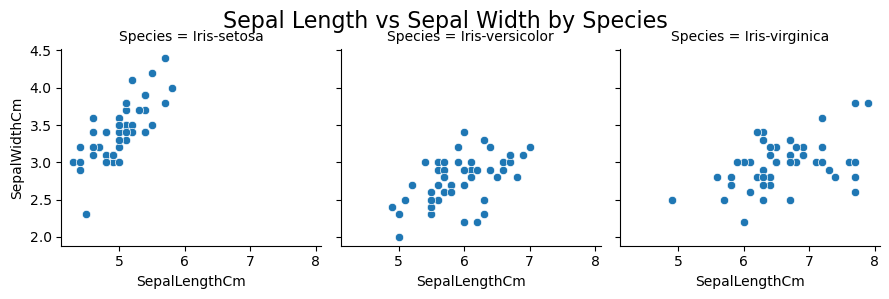

In [47]:
#14. create a scatter plot of 'SepalLengthCm' vs 'SepalWidthCm' using seaborn's facetgrid

# Create the FacetGrid
g = sns.FacetGrid(df, col="Species")
g.map_dataframe(sns.scatterplot, x="SepalLengthCm", y="SepalWidthCm")

# Add title and spacing
g.fig.suptitle("Sepal Length vs Sepal Width by Species", fontsize=16)
g.fig.subplots_adjust(top=0.85)
plt.show()

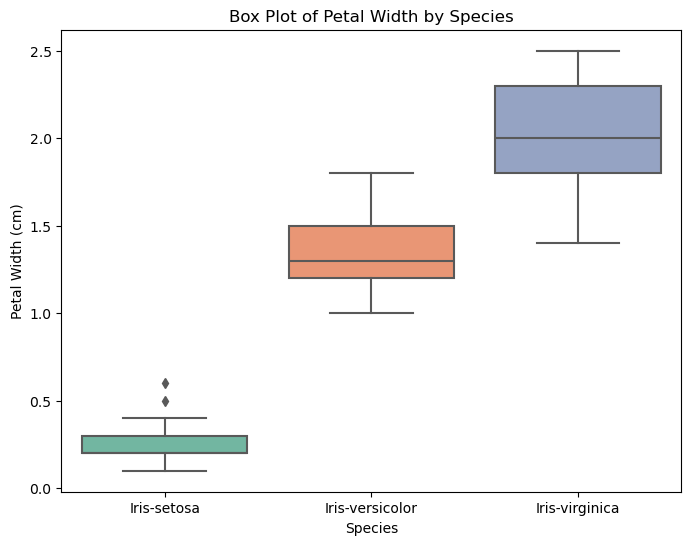

In [49]:
#15. Box plot of petalwidth for different species

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Species', y='PetalWidthCm', palette='Set2')

# Add titles and labels
plt.title('Box Plot of Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
# plt.grid(True)
plt.show()

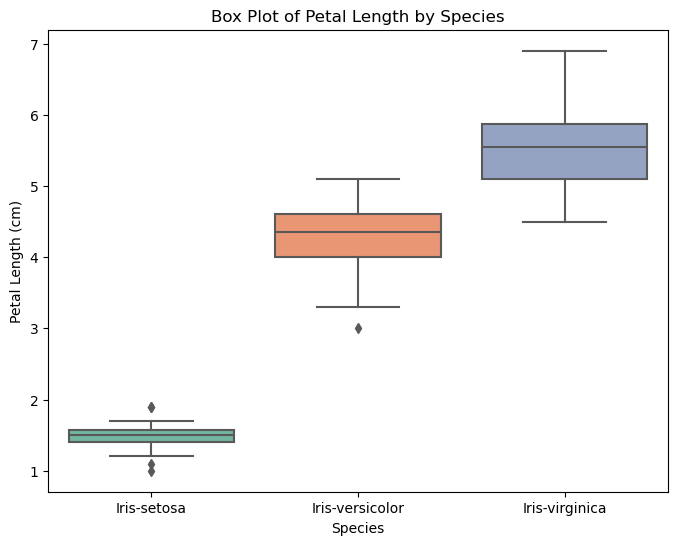

In [50]:
#16. Box plot of petallength for different species

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Species', y='PetalLengthCm', palette='Set2')

# Add titles and labels
plt.title('Box Plot of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
# plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

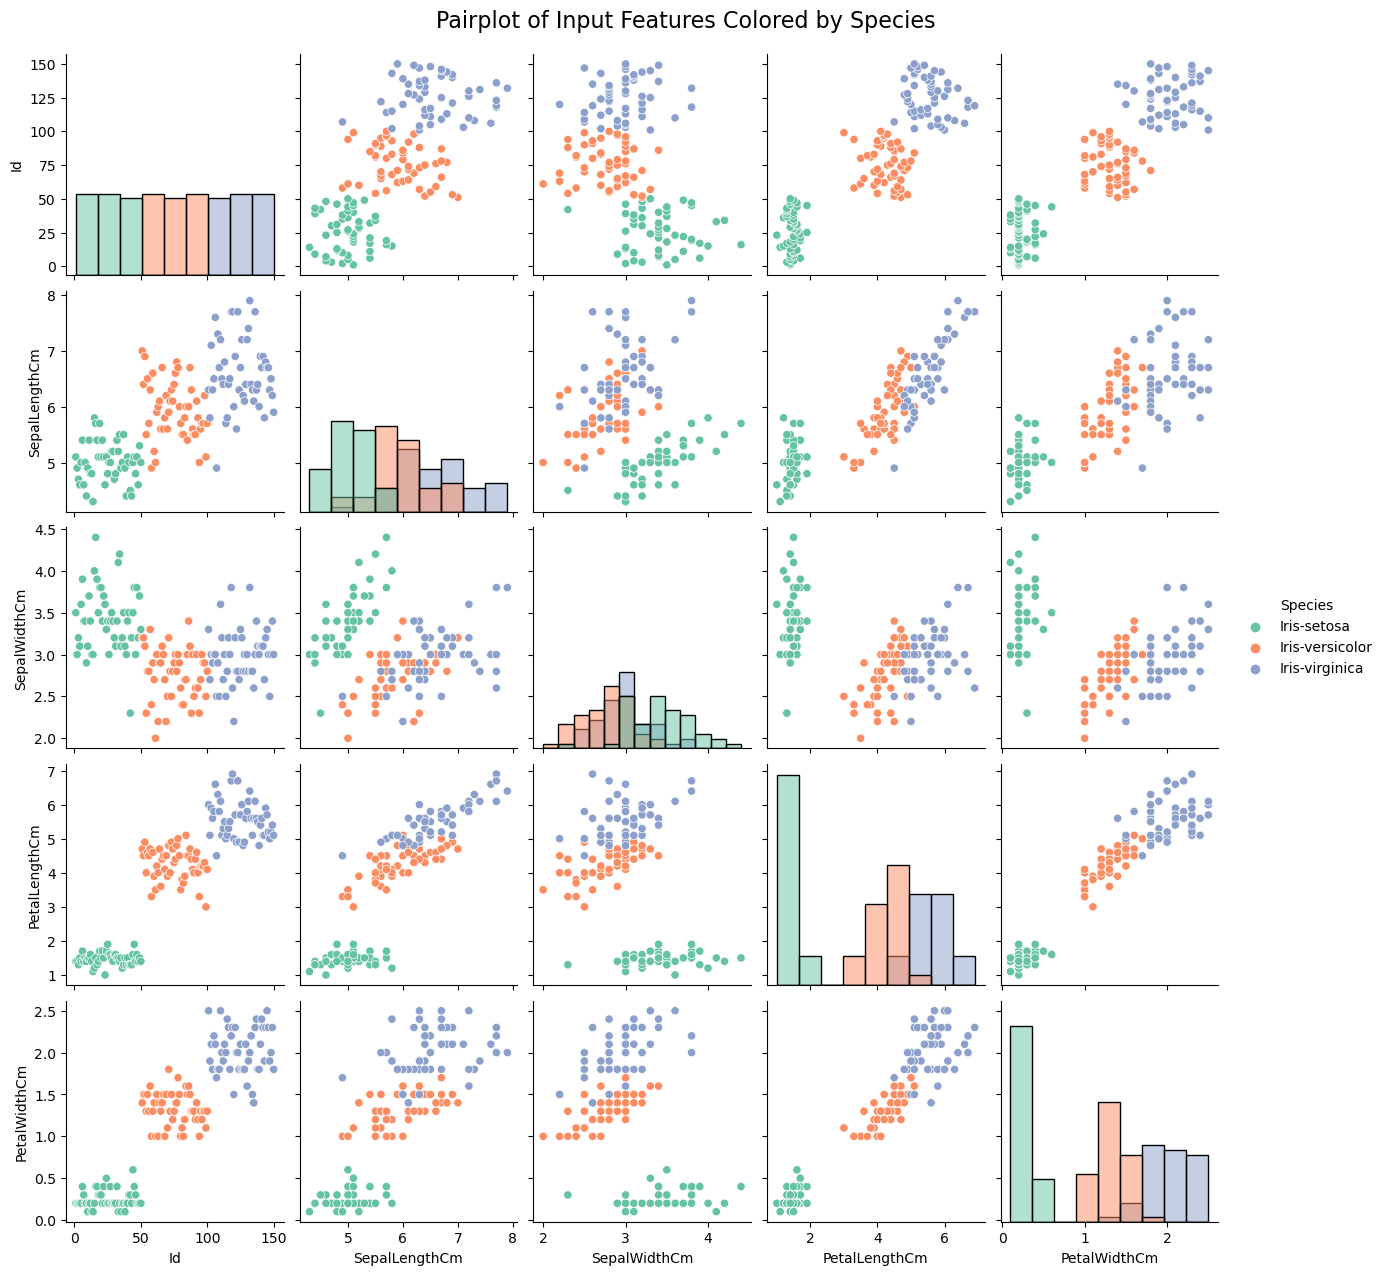

In [51]:
#17. Pairplot of all input features colosed by species (Use the hue parameter)

# Create the pairplot
sns.pairplot(df, hue='Species', diag_kind='hist', palette='Set2')

plt.suptitle('Pairplot of Input Features Colored by Species', y=1.02, fontsize=16)
plt.show()

In [52]:
#18. Print correlation among different features

# Drop non-numeric columns like ID or label/species
df_numeric = df.select_dtypes(include='number')

# Compute and print correlation matrix
correlation_matrix = df_numeric.corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [53]:
#19. Prepare X and Y

# Prepare X (input features) and Y (target)
X = df.drop(columns=['Species'])
Y = df['Species']

# Optional: print shapes
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (150, 5)
Shape of Y: (150,)


In [54]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
#20. Split it train and test data 70% train random state=1

# Split the data (70% train, 30% test, random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Optional: print sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (105, 5)
Test set size: (45, 5)


In [60]:
#21. Look at the documentation of the SVC that you will use to create the model

# Create an SVC model
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model
model.fit(X_train, Y_train)

# Predict on test set
predictions = model.predict(X_test)

In [61]:
#22. Model building

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create the model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1)

# 2. Train the model
svc_model.fit(X_train, Y_train)

# 3. Make predictions
Y_pred = svc_model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9777777777777777

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [ ]:
#23. 